## Random_OverSampling

Random over-sampling consists in extracting random samples from the minority class, until they reach a certain proportion compared to the majority class, typically 50:50, or in other words, a balancing ratio of 1.

- balancing ratio = (no. of observations in minority class / no. of observations in majority class)

In Random over-sampling, we extract samples from the minority class at random, with replacement.

In [1]:
# import libraries

import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn 
from sklearn.datasets import make_blobs

# from imblearn
from imblearn.over_sampling import RandomOverSampler

In [4]:
# creating toy dataset

X, y = make_blobs(n_samples=1600, n_features=2, centers=[(0,0),(5,5)], random_state= 42,  cluster_std=1.5)

X.shape, y.shape

((1600, 2), (1600,))

In [8]:
X[y ==1].sample(200)

,varA,varB
562,2.981194,3.771113
780,5.057357,2.827113
669,6.069068,2.175275
610,5.802226,6.843471
1489,5.189569,7.908393
...,...,...
103,5.061379,3.496719
838,3.565345,5.708609
571,3.567316,5.635399
639,5.247141,5.076332


In [9]:
# creating a data frame 

X = pd.DataFrame(data = X, columns = ['varA', 'varB'])
y = pd.Series(y)

# now, under sample the data for y ==1 
X = pd.concat([X[y == 0], X[y==1].sample(200, random_state=42)], axis = 0)

y = y.loc[X.index]

# display the shape
X.shape, y.shape

((1000, 2), (1000,))

In [13]:
# check the value counts for the target class
y.value_counts()

0    800
1    200
dtype: int64

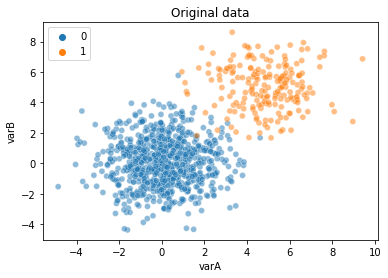

In [11]:
# plot the original data

sns.scatterplot(data = X, x = 'varA', y = 'varB', hue = y, alpha=0.5)
plt.title('Original data')
plt.show()

## Random Over-sampling

[RandomOverSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)


Selects samples from the minority class at random, with replacement, until we have as many observations as those in the majority class (or any other balancing ratio we wish).

In [12]:
# create RandomSampler object

ros = RandomOverSampler(sampling_strategy='auto', # samples from the minority class-- this is default
                        random_state=0) 

X_resampled, y_resampled = ros.fit_resample(X,y)
X_resampled.shape, y_resampled.shape

((1600, 2), (1600,))

In [14]:
# original data shape
X.shape, y.shape

((1000, 2), (1000,))

In [15]:
# balance values
# original data
y.value_counts()

0    800
1    200
dtype: int64

In [16]:
y_resampled.value_counts()

0    800
1    800
dtype: int64

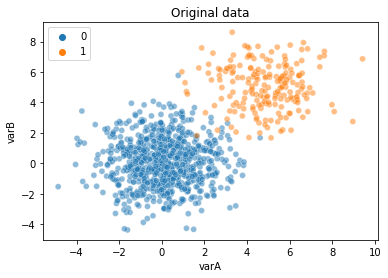

In [17]:
# plot the original data

sns.scatterplot(data = X, x = 'varA', y = 'varB', hue = y, alpha=0.5)
plt.title('Original data')
plt.show()

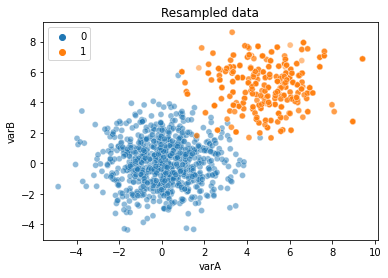

In [19]:
# plot the resampled data

# plot the original data

sns.scatterplot(data = X_resampled, x = 'varA', y = 'varB', hue = y_resampled, alpha=0.5)
plt.title('Resampled data')
plt.show()

- Here we can see the darker orange color observations as many of the observations from the minority class are duplicated
- This process of over sampling may introduce over fitting as it duplicates observations 
- To reduce over fitting, we can specify the balancing ratio

## Multi Class Data

In [20]:
# create a multi class dataset

X, y = make_blobs(n_samples=1600,
           n_features=3,
           cluster_std=1.5,
           centers=[(0,0),(5,5),(-1,5)],
           random_state=42)

X.shape, y.shape

((1600, 2), (1600,))

In [23]:
# convert into a DataFrame and series
X = pd.DataFrame(data = X, columns = ['varA', 'varB'])
y = pd.Series(y)

# concat
X = pd.concat([X[y==0],
             X[y==1].sample(100, random_state=42),
             X[y==2].sample(100, random_state=42)],
             axis = 0)
y = y.loc[X.index]

X.shape, y.shape

((734, 2), (734,))

In [24]:
y.value_counts()

0    534
1    100
2    100
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

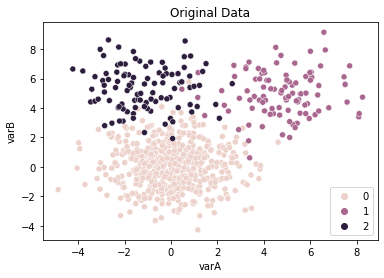

In [25]:
# plot

sns.scatterplot(data = X, x = 'varA', y ='varB', hue = y)
plt.title('Original Data')
plt.show

In [26]:
## Perform Random Oversampling

ros = RandomOverSampler(sampling_strategy='not majority', # samples from all class except the majority one
                       random_state=0)

X_res, y_res = ros.fit_resample(X,y)
X_res.shape, y_res.shape

((1602, 2), (1602,))

In [27]:
y_res.value_counts()

0    534
1    534
2    534
dtype: int64

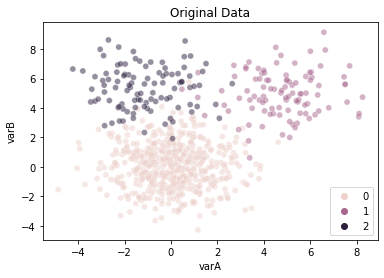

In [32]:
# plot

sns.scatterplot(data = X, x = 'varA', y ='varB', hue = y, alpha = 0.5)
plt.title('Original Data')
plt.show()

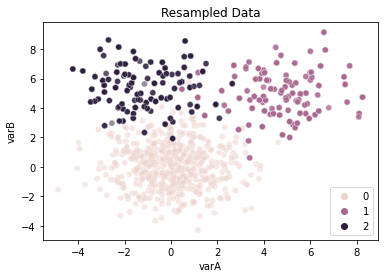

In [31]:
# Resampled

sns.scatterplot(data = X_res, x = 'varA', y ='varB', hue = y_res, alpha = 0.5)
plt.title('Resampled Data')
plt.show()

- Similarly, we can see darker shades for classes 1 and 2 which contains over sampled observations